<a href="https://colab.research.google.com/github/andremartins7/datah-m1-challange/blob/main/LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação das biliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

plt.style.use('fivethirtyeight')

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Carregando os dados
item = pd.read_csv('/content/meta-item.csv')
store = pd.read_csv('/content/meta-store.csv')
submission = pd.read_csv('/content/submission_sample.csv')

column_names = ['DATE','S100','I100','C100','C101','QTT'] 
sales = pd.read_csv('/content/sales.csv', header=None, delimiter=",", names=column_names)
sales = sales.iloc[1: , :]
sales

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,S100,I100,C100,C101,QTT
1,2017-01-08,0,0,12,76,2
2,2017-01-08,0,0,12,149,3
3,2017-01-08,0,0,12,256,3
4,2017-01-08,0,0,12,354,3
5,2017-01-08,0,0,13,149,2
...,...,...,...,...,...,...
2749365,2021-09-26,29,92,14,354,1
2749366,2021-09-26,29,94,12,354,1
2749367,2021-09-26,29,94,13,354,2
2749368,2021-09-26,29,95,12,354,1


In [ ]:
# Função para analisa o dataset
def load_info(data):
  print('\nThe shape of the dataset is:', data.shape)
  print('\nThe headof the dataset is:\n', data.head(5))
  print('\nThe column types are:\n', data.dtypes)  
  print('\nThe Describing of dataset is:\n',data.describe())
  print('\nThere are null values?\n', data.isnull().sum())

In [ ]:
# análise de sales
load_info(sales)


The shape of the dataset is: (2749369, 6)

The headof the dataset is:
          DATE S100 I100 C100 C101 QTT
1  2017-01-08    0    0   12   76   2
2  2017-01-08    0    0   12  149   3
3  2017-01-08    0    0   12  256   3
4  2017-01-08    0    0   12  354   3
5  2017-01-08    0    0   13  149   2

The column types are:
 DATE    object
S100    object
I100    object
C100    object
C101    object
QTT     object
dtype: object

The Describing of dataset is:
               DATE     S100     I100     C100     C101      QTT
count      2749369  2749369  2749369  2749369  2749369  2749369
unique         243       62      188       39      609      270
top     2017-12-24       13       19       13      354        1
freq         22494   114848   104812   765079   526522  1350919

There are null values?
 DATE    0
S100    0
I100    0
C100    0
C101    0
QTT     0
dtype: int64


In [ ]:
# Merge dos datasets item, stores
teste = pd.merge(item,sales, how = 'inner', on = 'I100')
sales = pd.merge(store,teste, how = 'inner', on = 'S100')
sales.head()

,S100,S101,S102,S103,I100,I101,I102,I103,DATE,C100,C101,QTT
0,0,1,17,10,0,2,1,1,2017-05-28,12,76,1
1,0,1,17,10,0,2,1,1,2017-05-28,12,354,1
2,0,1,17,10,0,2,1,1,2017-05-28,13,76,2
3,0,1,17,10,0,2,1,1,2017-05-28,13,354,1
4,0,1,17,10,0,2,1,1,2017-05-28,14,149,1


In [ ]:
sales.describe()

,S101,S102,S103,I101,I102,I103
count,2.618298e+06,2.618298e+06,2.618298e+06,2.618298e+06,2.618298e+06,2.618298e+06
mean,9.714849e-01,1.107709e+01,7.232796e+00,1.676901e+00,1.336556e+00,1.881839e+00
std,1.664391e-01,6.062331e+00,3.303175e+00,1.312404e+00,6.268583e-01,3.445027e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,5.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
50%,1.000000e+00,1.300000e+01,9.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00
75%,1.000000e+00,1.800000e+01,1.000000e+01,3.000000e+00,2.000000e+00,2.000000e+00
max,1.000000e+00,1.900000e+01,1.000000e+01,5.000000e+00,2.000000e+00,2.000000e+00


In [ ]:
# Converte DATE para datetime
sales['DATE'] = pd.to_datetime(sales['DATE'])
sales['QTT'] = pd.to_numeric(sales['QTT'], errors='coerce')

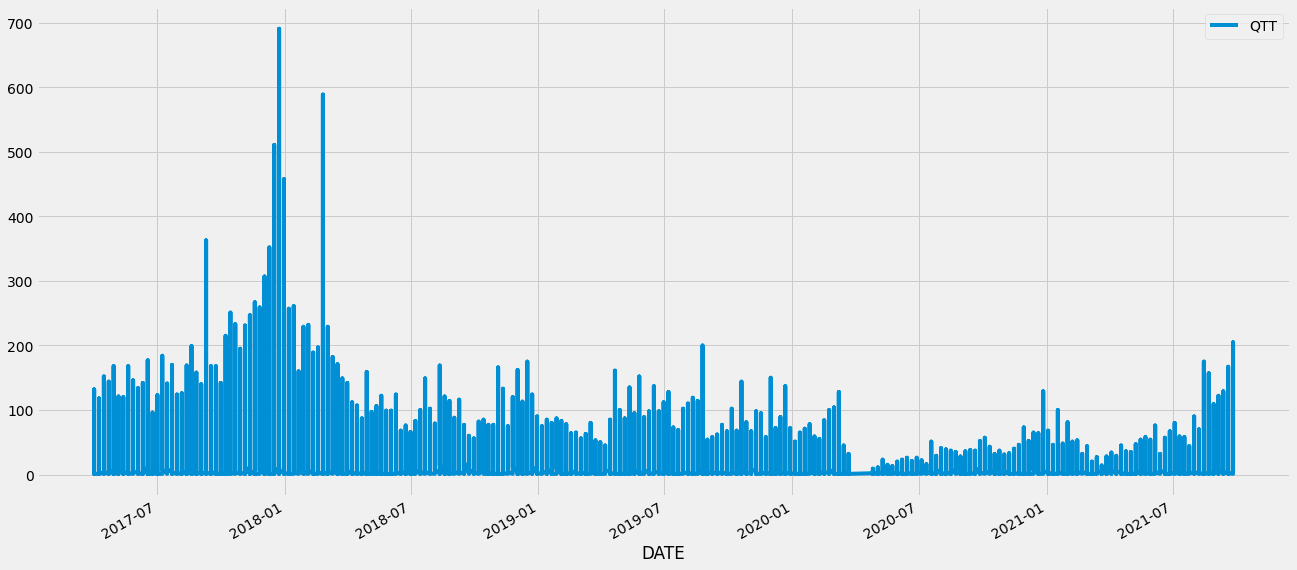

In [ ]:
import matplotlib.pyplot as plt

sales.plot(x='DATE',y='QTT',figsize=(20,10))
plt.show()

In [ ]:
# Criação de novas Features baseadas em DATE
sales['Year'] = sales['DATE'].dt.year
sales['Month'] = sales['DATE'].dt.month
sales['Day'] = sales['DATE'].dt.day
sales.head()

,S100,S101,S102,S103,I100,I101,I102,I103,DATE,C100,C101,QTT,Year,Month,Day
0,0,1,17,10,0,2,1,1,2017-05-28,12,76,1,2017,5,28
1,0,1,17,10,0,2,1,1,2017-05-28,12,354,1,2017,5,28
2,0,1,17,10,0,2,1,1,2017-05-28,13,76,2,2017,5,28
3,0,1,17,10,0,2,1,1,2017-05-28,13,354,1,2017,5,28
4,0,1,17,10,0,2,1,1,2017-05-28,14,149,1,2017,5,28


In [ ]:
# Criação de novas variáveis
QTT_mean = sales['QTT'].mean()
QTT_DEV = sales['QTT'].std()
QTT_max = sales['QTT'].max()
c = QTT_mean + QTT_DEV
d = QTT_mean +(QTT_max/(3*QTT_DEV))

In [ ]:
# Seleção de parte do dataset devido a análise de tendência das vendas
df_remove = sales.loc[sales['Month'] <= 6] 
sales = sales.drop(df_remove.index)

df_remove2 = sales.loc[sales['Year'] <= 2019] 
sales = sales.drop(df_remove2.index)

cut = c
df_remove3 = sales.loc[sales['QTT'] >= cut]
sales = sales.drop(df_remove3.index)

sales.describe()

,S101,S102,S103,I101,I102,I103,QTT,Year,Month,Day
count,351863.000000,351863.000000,351863.000000,351863.000000,351863.000000,351863.000000,351863.000000,351863.000000,351863.000000,351863.000000
mean,0.994967,11.096080,7.029884,1.791996,1.344540,1.882753,1.814169,2020.362411,9.133353,15.466375
std,0.070766,6.034279,3.362670,1.296772,0.633029,0.342817,1.110843,0.480697,1.655467,8.708688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2020.000000,7.000000,1.000000
25%,1.000000,5.000000,4.000000,0.000000,1.000000,2.000000,1.000000,2020.000000,8.000000,8.000000
50%,1.000000,13.000000,9.000000,2.000000,1.000000,2.000000,1.000000,2020.000000,9.000000,15.000000
75%,1.000000,18.000000,10.000000,3.000000,2.000000,2.000000,2.000000,2021.000000,11.000000,23.000000
max,1.000000,19.000000,10.000000,5.000000,2.000000,2.000000,5.000000,2021.000000,12.000000,30.000000


In [ ]:
# Separação de features e target
features = ['Year','Month','Day','S100','S101','S102','S103','I100','I101','I102','I103','C100','C101']

X = sales[features]
y = sales['QTT']

In [ ]:
# Seraparação de dados entre treino e teste
train_ind = int(0.77 * X.shape[0])
x_train = X[:train_ind]
x_test = X[train_ind:]
y_train = y[:train_ind]
y_test = y[train_ind:]

In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
# Colocar os dados na mesma escala
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
# scaling
x_train_sc = scaler_x.fit_transform(x_train)
x_test_sc = scaler_x.transform(x_test)
y_train_sc = scaler_y.fit_transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [ ]:
def lstm_data_transform(x_data, y_data, num_steps):
    
# Prepare the list for the transformed data
    X, y = list(), list()
# Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
# if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
# Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
# Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)

# Make final arrays

    x_array = np.array(X)
    y_array = np.array(y)
    
    return x_array,y_array

In [ ]:
# Realiza o reshape dos
num_steps = 13 #Número de features do dataset de treino 
# training set
(x_train_transformed,
 y_train_transformed) = lstm_data_transform(x_train_sc, y_train_sc, num_steps=num_steps)
assert x_train_transformed.shape[0] == y_train_transformed.shape[0]
# test set
(x_test_transformed,
 y_test_transformed) = lstm_data_transform(x_test_sc, y_test_sc, num_steps=num_steps)
assert x_test_transformed.shape[0] == y_test_transformed.shape[0]

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

save_best = ModelCheckpoint("best_weights.h5", monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=5, min_lr=0.00001, verbose = 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(num_steps, 13), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss='mse', optimizer=optimizer)

In [ ]:
history = model.fit(x_train_transformed, y_train_transformed,
                    epochs=2,
                    batch_size=1,
                    verbose=1,
                    shuffle=False,
                    validation_data=(x_test_transformed, y_test_transformed),
                    callbacks=[reduce_lr, save_best])

Epoch 1/2
270921/270921 [==============================] - 1193s 4ms/step - loss: 0.9261 - val_loss: 1.2525 - lr: 0.0020
Epoch 2/2
270921/270921 [==============================] - 1208s 4ms/step - loss: 0.9226 - val_loss: 1.1287 - lr: 0.0020


In [ ]:
train_predict=model.predict(x_train_transformed)
test_predict = model.predict(x_test_transformed)

In [ ]:
test_predict

array([[0.34300652],
       [0.33483496],
       [0.37162572],
       ...,
       [0.32136792],
       [0.32277885],
       [0.3211904 ]], dtype=float32)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
print('RMSE: ',math.sqrt(mean_squared_error(y_test_transformed,test_predict)))

RMSE:  1.0623853112703316


In [ ]:
# Referência para o reshape: https://towardsdatascience.com/how-to-reshape-data-and-do-regression-for-time-series-using-lstm-133dad96cd00